# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
df.shape

(1898, 9)

#### Observations:

*   The dataset has 1898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:


*   There are 3 different of data types - int64 (represents numerical variables which are integers), float64 (reepresents nunerical variables which are floating point) and object (represents categorical variables).


*   The columns, order_id, customer_id, food_preparation_time and delivery_time are of the int64 datatype.

*   The column, cost_of_the_order is of the float64 datatype.


*   The columns, restaurant_name, cuisine_type, day_of_the_week and rating are categorical datatypes here.


*   Oddly, the column, rating is a categorical variable. This is probably due to non-numerical entries in the column.










### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
df.isnull().values.any()

False

#### Observations:

The output of the above code which is False means that there is no missing value in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

*   The minimum time it takes for the food to be prepared once the order is placed is 20 minutes.

*   The average time it takes for the food to be prepared once the order is placed is 27.37 minutes.


*   The minimum time it takes for the food to be prepared once the order is placed is 35 minutes.






### **Question 5:** How many orders are not rated?

In [9]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

736 orders have not been rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [44]:
# check unique order ID
df['order_id'].nunique()

1898

In [45]:
# check unique customer ID
df['customer_id'].nunique()

1200

In [46]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

In [47]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

<Axes: xlabel='cuisine_type', ylabel='count'>

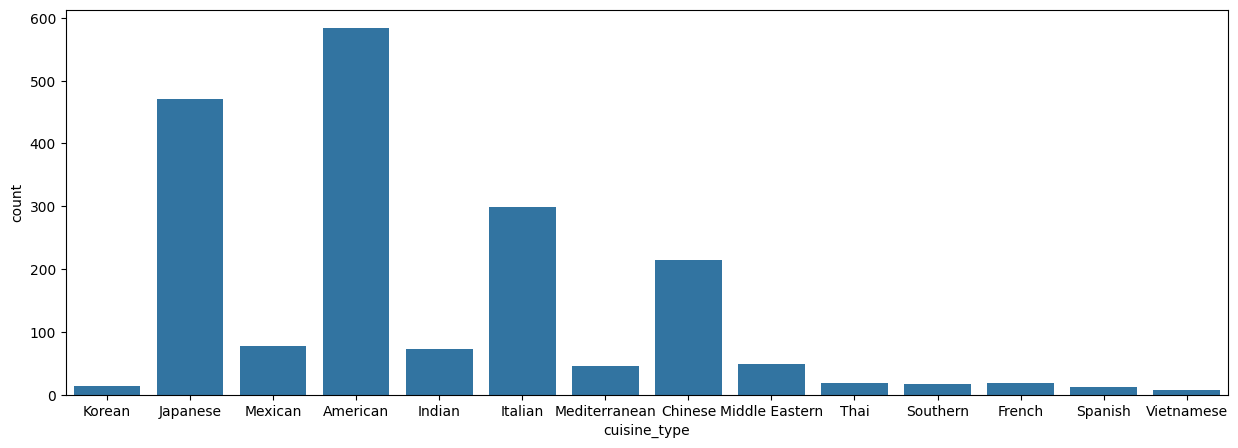

In [48]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

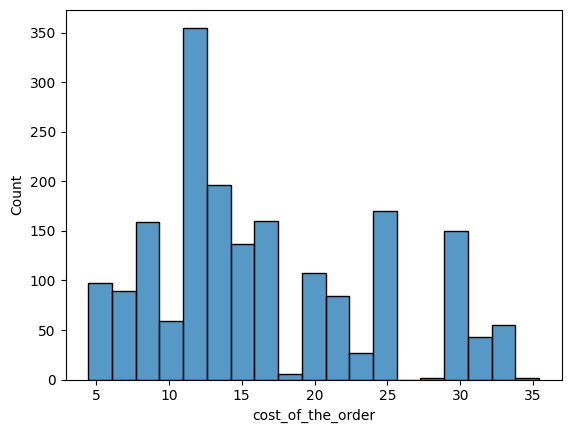

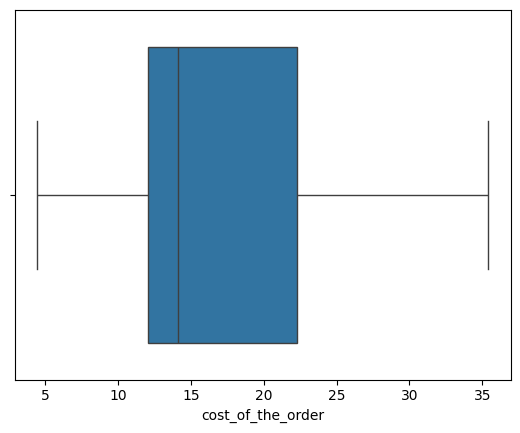

In [49]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

<Axes: xlabel='day_of_the_week', ylabel='count'>

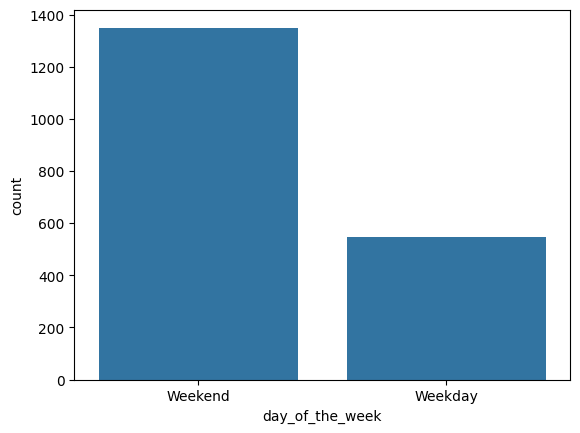

In [52]:
# # Check the unique values
df['day_of_the_week'].nunique()
sns.countplot(data = df, x = 'day_of_the_week')

<Axes: xlabel='rating', ylabel='count'>

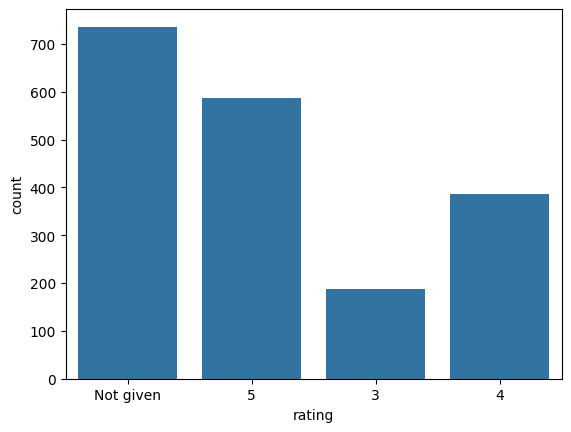

In [53]:
# Check the unique values
df['rating'].nunique()
sns.countplot(data = df, x = 'rating')

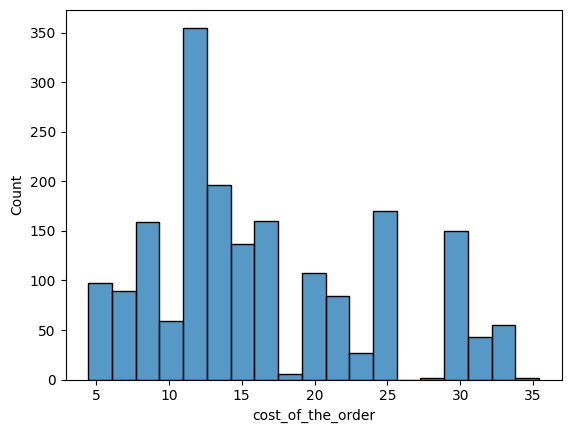

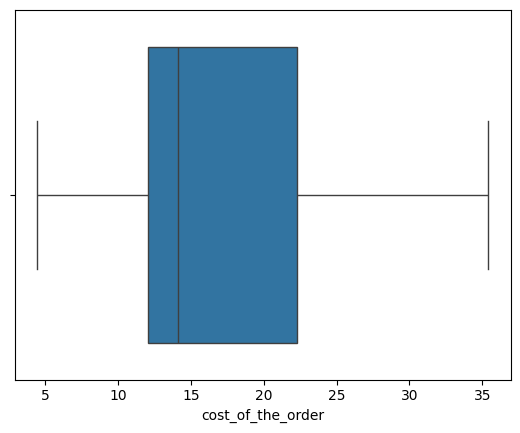

In [55]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

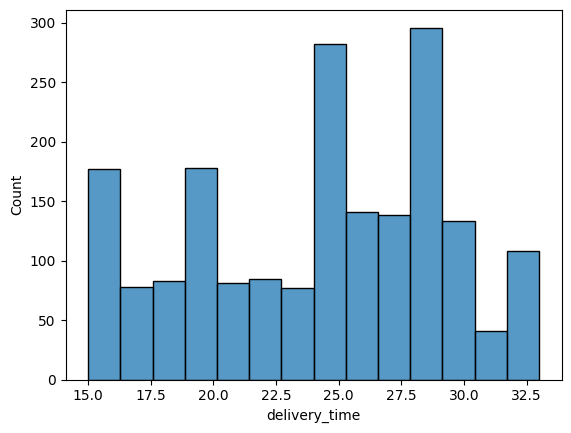

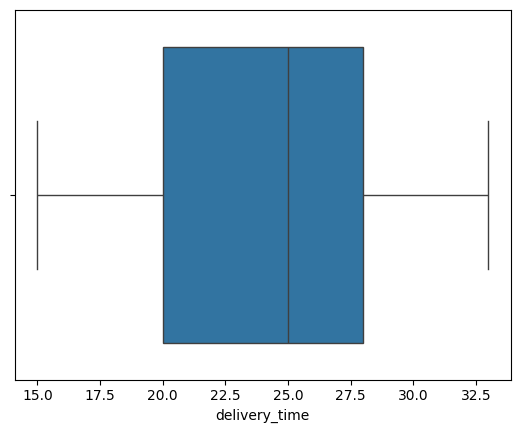

In [56]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [10]:
# The head function will return the top 5
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 restaurants in terms of number of orders received are:

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends?

In [12]:
# Creating a new dataframe with just the weekend data
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:

The most popular cuisine on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [14]:
# Create new dataframe with only orders which cost more than 20 dollars
df_greater_than_twenty = df[df['cost_of_the_order']>20]

# Obtain the number of orders that cost more than 20 dollars
n_20 = df_greater_than_twenty.shape[0]

# Calculate percentage of such orders in the dataset
percentage = (n_20 / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Percentage of orders above 20 dollars: 29.24 %


#### Observations:

Of all the orders placed, 29.24% cost more than $20.

### **Question 10**: What is the mean order delivery time?

In [15]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is  24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [16]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

The three most frequent customers have the customer ids, 52832, 47440 and 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<ipython-input-57-d4845c8bfb45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


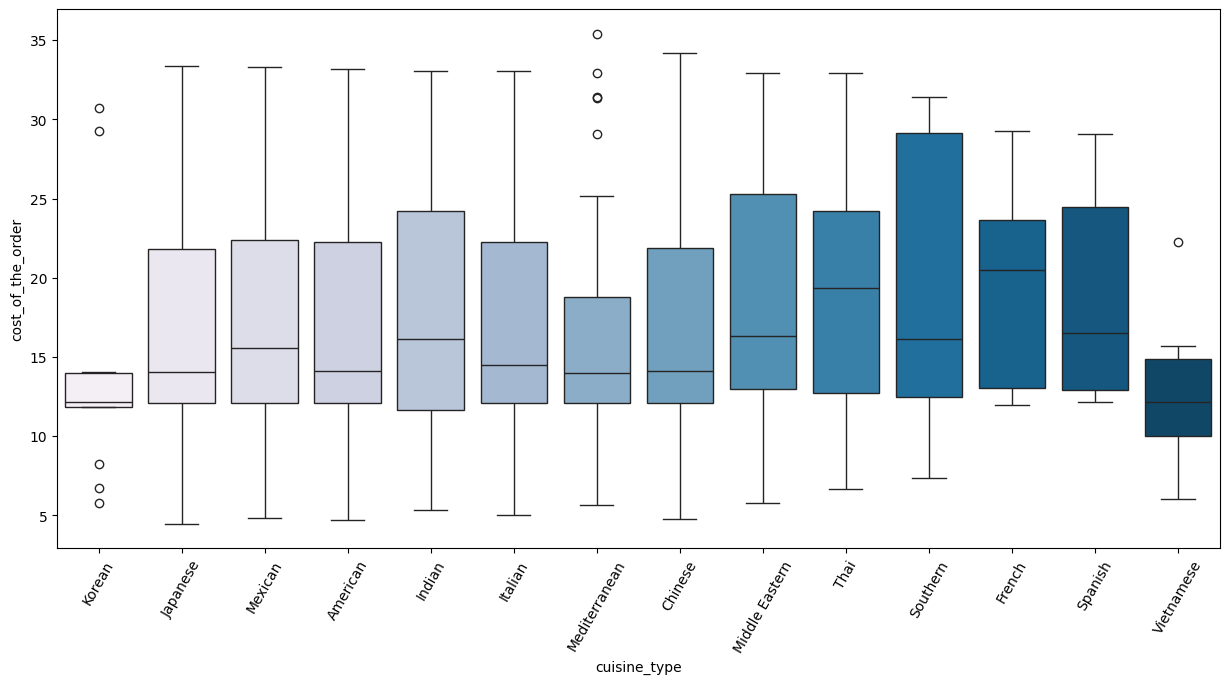

In [57]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

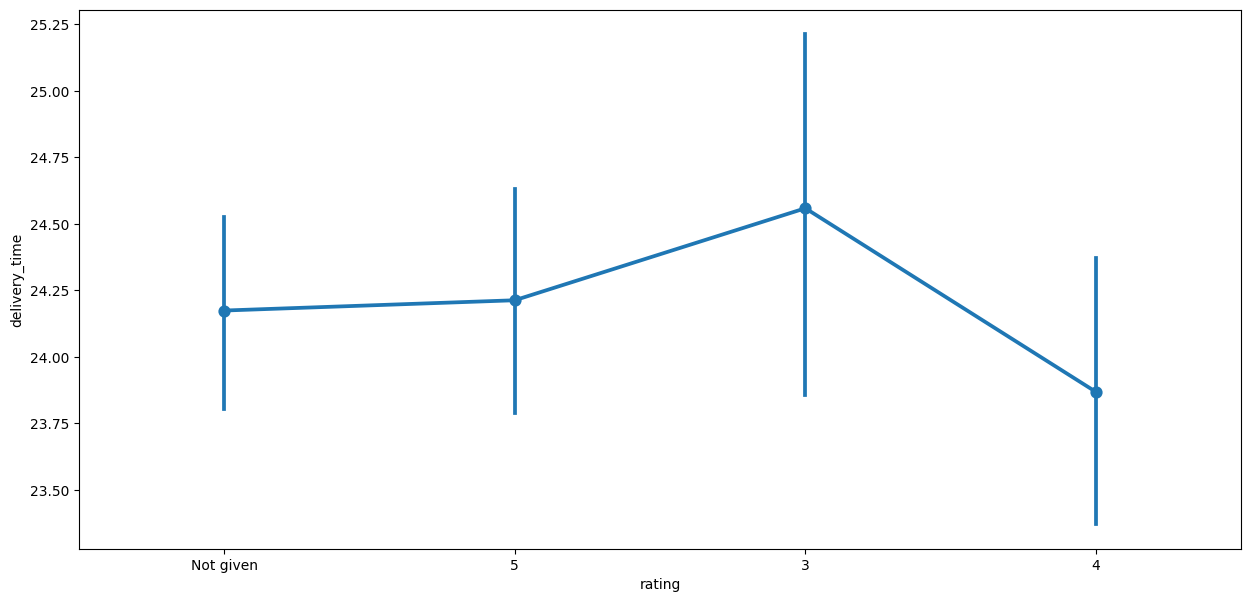

In [58]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

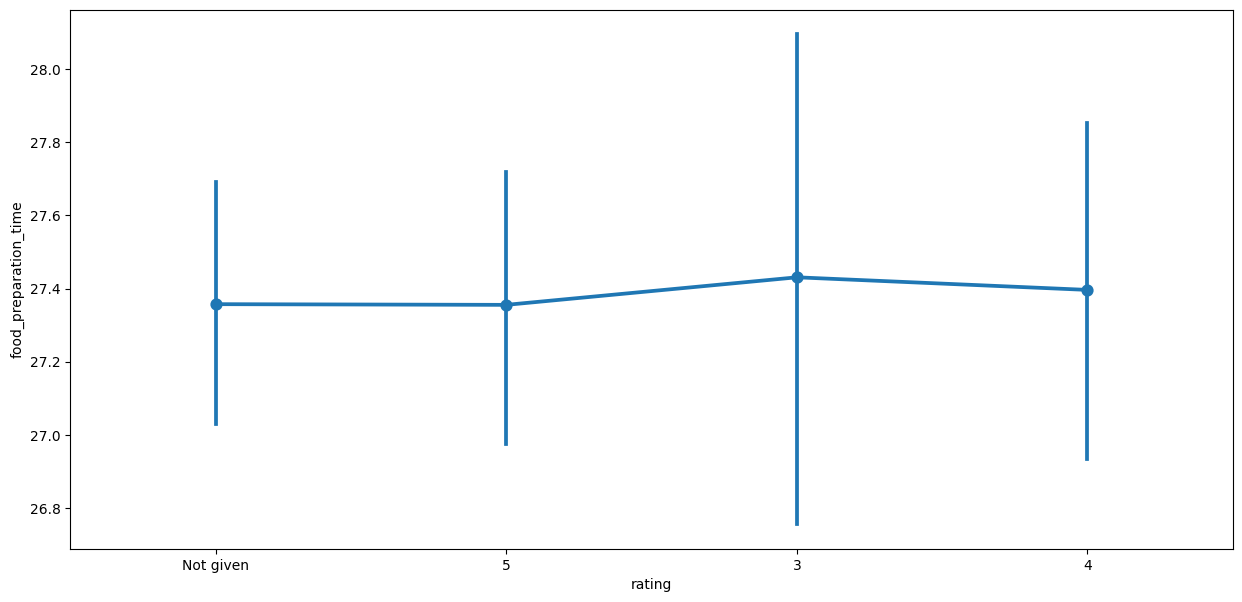

In [62]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

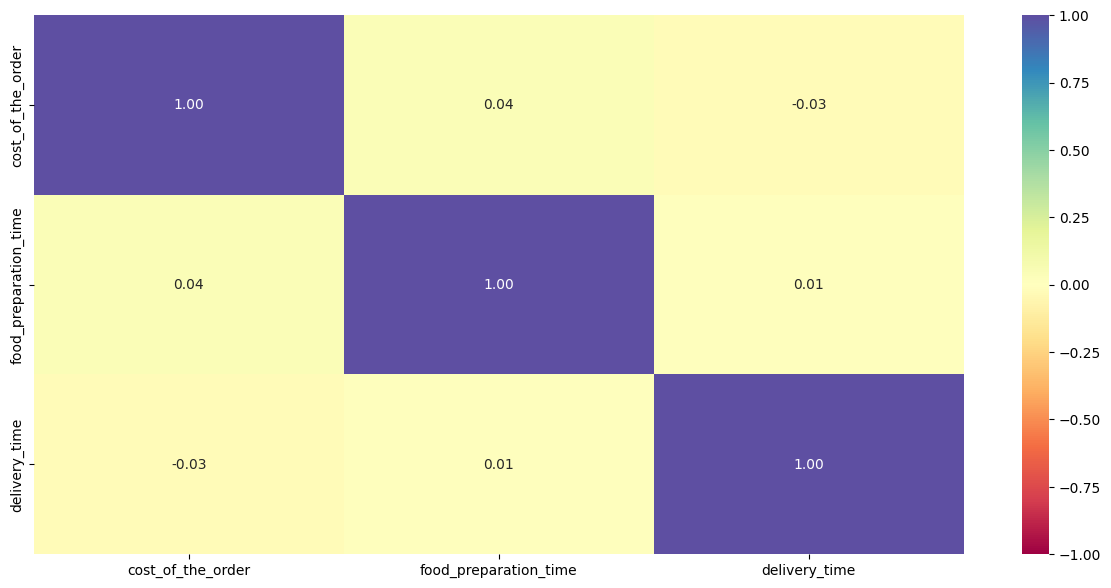

In [63]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [34]:
# Create new dataframe of restaurants which have a valid rating
df_rate = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer as this column was not a numeric type
df_rate['rating'] = df_rate['rating'].astype('int')

df_rating_count = df_rate.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_50 = df_rate[df_rate['restaurant_name'].isin(df_rating_count[df_rating_count['rating']>50]['restaurant_name'])].copy()

print(df_rating_50.groupby(['restaurant_name'])['rating'].mean())

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations:
The restaurants that are eligible for the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [35]:
# The variable revenue will be updated with each iteration of the rows of the dataframe
revenue = 0
df_revenue = df.copy()
for idx, value in df_revenue.iterrows():
    if value['cost_of_the_order'] > 20:
       revenue = revenue + 0.25*value['cost_of_the_order']
    elif value['cost_of_the_order'] > 5:
       revenue = revenue + 0.15*value['cost_of_the_order']

print(revenue)

6166.302999999994


#### Observations:
The net revenue generated by the company across all orders is $6166.303.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [41]:
# Number of orders that took more than 60 mins is stored in the variable n_60
n_60 = 0
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
for idx, value in df.iterrows():
  if(df['total_time'][idx]) > 60:
    n_60 = n_60 + 1

print(100*n_60/df.shape[0])

10.53740779768177


#### Observations:
10.53% of the orders took more than 60 minutes to get delivered from the time the order was placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [43]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
On weekends the avg. delivery time is lower compared to weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
  

*   There is no correlation between delivery time, cost of the order and delivery time.
*   Vietnamese food is the cheapest while Southern food is the most expensive.



### Recommendations:

*  The company can put more offers on American
food given the demand and also the raatings.

* To promote same on weekdays more, the total time should be decreased and more promotional offers should be given.

---